Epoch 1/50
50/50 [==============================] - 3s 14ms/step - loss: 0.1704 - accuracy: 0.0000e+00 - val_loss: 0.0345 - val_accuracy: 0.0000e+00
Epoch 2/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0093 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 3/50
50/50 [==============================] - 1s 12ms/step - loss: 9.4992e-04 - accuracy: 0.0000e+00 - val_loss: 4.4882e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
50/50 [==============================] - 1s 11ms/step - loss: 2.6822e-04 - accuracy: 0.0000e+00 - val_loss: 1.0256e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
50/50 [==============================] - 0s 9ms/step - loss: 7.0657e-05 - accuracy: 0.0000e+00 - val_loss: 4.0499e-05 - val_accuracy: 0.0000e+00
Epoch 6/50
50/50 [==============================] - 1s 11ms/step - loss: 3.3670e-05 - accuracy: 0.0000e+00 - val_loss: 2.2584e-05 - val_accuracy: 0.0000e+00
Epoch 7/50
50/50 [==============================] - 1s 12ms/step - loss: 1.6

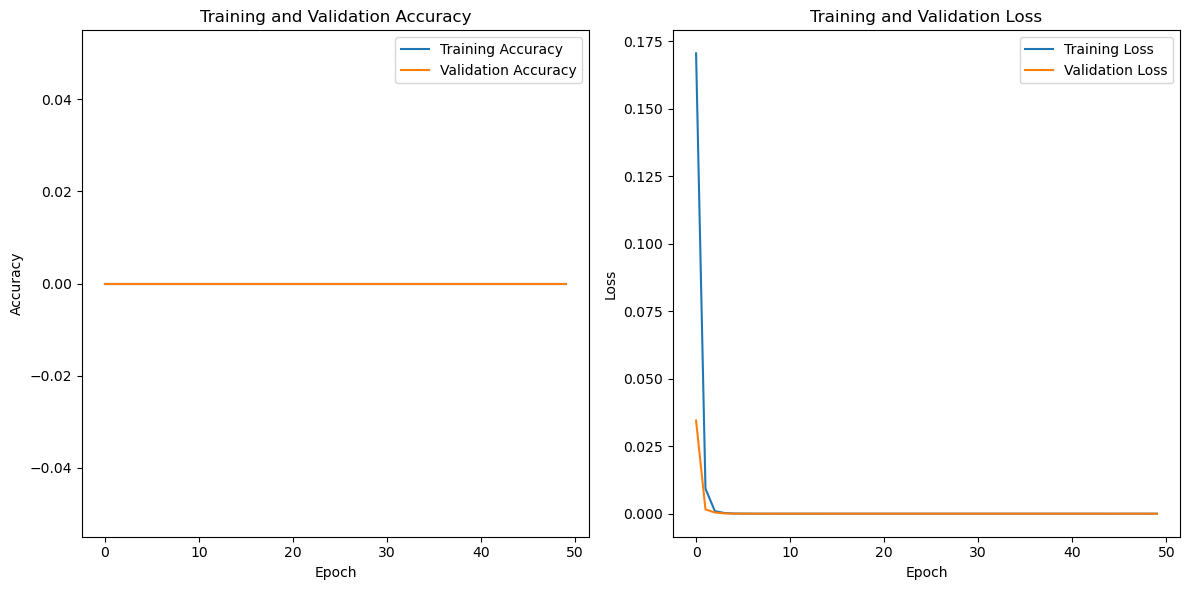

1/1 [==============================] - 0s 32ms/step


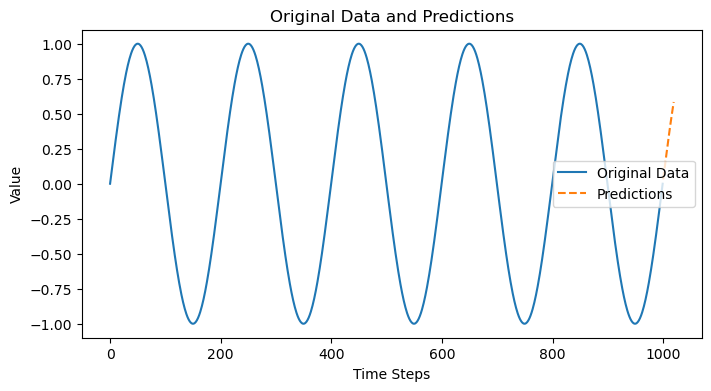

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate a sine wave dataset
def generate_data(n_points):
    t = np.linspace(0, 10*np.pi, n_points)
    data = np.sin(t)
    return data

# Create sequences for training the RNN
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Generate and preprocess data
np.random.seed(42)
data = generate_data(1000)
seq_length = 10
sequences, targets = create_sequences(data, seq_length)

# Reshape data for RNN input
sequences = sequences.reshape(-1, seq_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(seq_length, 1), activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(sequences, targets, epochs=50, batch_size=16, validation_split=0.2)

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions
def predict_next_values(model, initial_sequence, steps):
    sequence = np.array(initial_sequence).reshape(1, -1, 1)
    predictions = []
    for _ in range(steps):
        next_value = model.predict(sequence)[0, 0]
        predictions.append(next_value)
        sequence = np.roll(sequence, -1, axis=1)
        sequence[0, -1, 0] = next_value
    return predictions

# Example prediction
initial_sequence = data[-seq_length:]
predicted_values = predict_next_values(model, initial_sequence, steps=20)

# Plot the original data and predictions
plt.figure(figsize=(8, 4))
plt.plot(data, label='Original Data')
plt.plot(range(len(data), len(data)+len(predicted_values)), predicted_values, label='Predictions', linestyle='--')
plt.title('Original Data and Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


Epoch 1/50
50/50 [==============================] - 2s 11ms/step - loss: 122848.3203 - accuracy: 0.0000e+00 - val_loss: 2263.3672 - val_accuracy: 0.0000e+00
Epoch 2/50
50/50 [==============================] - 0s 7ms/step - loss: 378.7861 - accuracy: 0.0000e+00 - val_loss: 8.5501 - val_accuracy: 0.0000e+00
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 3.3715 - accuracy: 0.0000e+00 - val_loss: 4.1319 - val_accuracy: 0.0000e+00
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: 2.0869 - accuracy: 0.0000e+00 - val_loss: 4.0733 - val_accuracy: 0.0000e+00
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 2.0729 - accuracy: 0.0000e+00 - val_loss: 4.6505 - val_accuracy: 0.0000e+00
Epoch 6/50
50/50 [==============================] - 0s 6ms/step - loss: 2.0759 - accuracy: 0.0000e+00 - val_loss: 3.6514 - val_accuracy: 0.0000e+00
Epoch 7/50
50/50 [==============================] - 0s 6ms/step - loss: 2.0813 - accuracy: 0.0000e+00

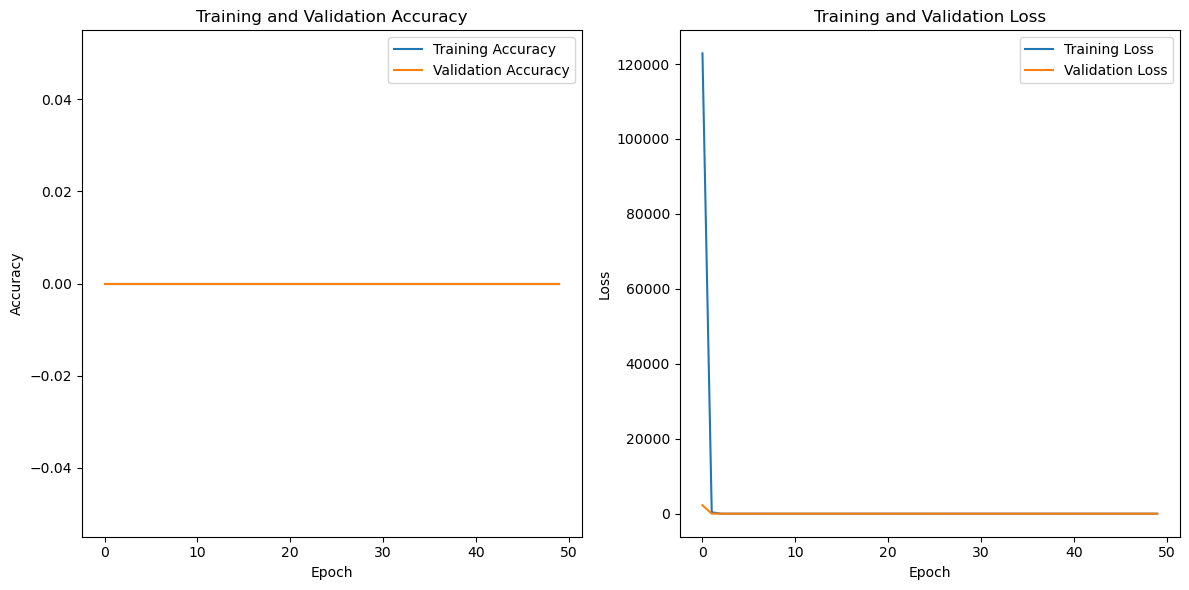

1/1 [==============================] - 0s 31ms/step


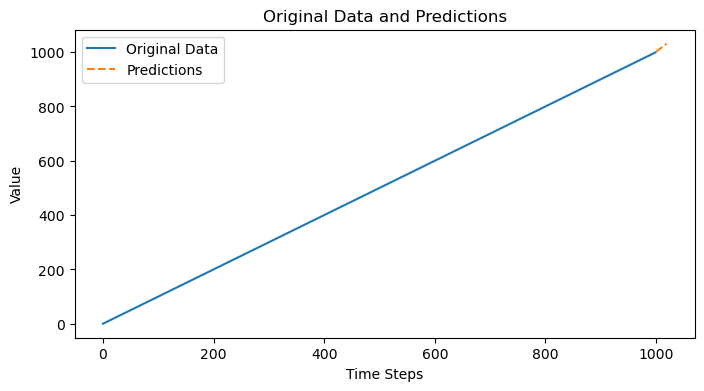

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate a dataset with increasing values
def generate_data(n_points):
    t = np.arange(n_points)
    data = np.arange(n_points)
    return data

# Create sequences for training the RNN
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Generate and preprocess data
np.random.seed(42)
data = generate_data(1000)
seq_length = 10
sequences, targets = create_sequences(data, seq_length)

# Reshape data for RNN input
sequences = sequences.reshape(-1, seq_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(seq_length, 1), activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(sequences, targets, epochs=50, batch_size=16, validation_split=0.2)

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Example prediction
initial_sequence = data[-seq_length:]
predicted_values = predict_next_values(model, initial_sequence, steps=20)

# Plot the original data and predictions
plt.figure(figsize=(8, 4))
plt.plot(data, label='Original Data')
plt.plot(range(len(data), len(data)+len(predicted_values)), predicted_values, label='Predictions', linestyle='--')
plt.title('Original Data and Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 2.3031 - accuracy: 0.1111 - val_loss: 2.3020 - val_accuracy: 0.1072
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 2.3014 - accuracy: 0.1143 - val_loss: 2.3020 - val_accuracy: 0.1065
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 2.3008 - accuracy: 0.1146 - val_loss: 2.3023 - val_accuracy: 0.1067
Epoch 4/5
1500/1500 [==============================] - 13s 8ms/step - loss: 2.2998 - accuracy: 0.1155 - val_loss: 2.3034 - val_accuracy: 0.1064
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 2.2986 - accuracy: 0.1173 - val_loss: 2.3042 - val_accuracy: 0.1062


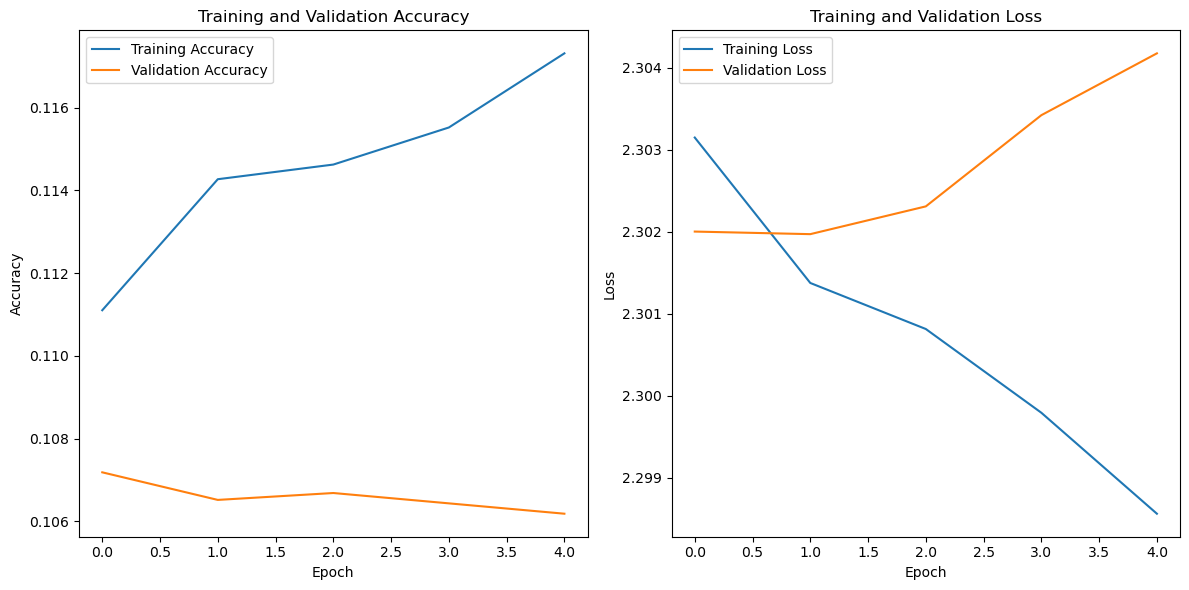

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create sequences for training the RNN
def create_sequences(images, labels, seq_length):
    sequences, targets = [], []
    for i in range(len(images)-seq_length):
        seq = images[i:i+seq_length]
        target = labels[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Generate sequences for training
seq_length = 10
train_sequences, train_targets = create_sequences(train_images, train_labels, seq_length)
test_sequences, test_targets = create_sequences(test_images, test_labels, seq_length)

# Reshape data for RNN input
train_sequences = train_sequences.reshape(-1, seq_length, 28*28)  # Flatten each image to a vector
test_sequences = test_sequences.reshape(-1, seq_length, 28*28)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(seq_length, 28*28), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_sequences, train_targets, epochs=5, batch_size=32, validation_split=0.2)

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
